In [4]:
%pylab inline
import pandas  
import seaborn
import matplotlib.pyplot as plt

data= pandas.read_csv("C:\\Users\\Sumedha\\Desktop\\uber-raw-data-apr14.txt")

#convert date time and add some useful columns

# dt= '4/30/2014 23:22:00'
## dt= pandas.to_datetime(dt)

data['Date/Time']= data['Date/Time'].map(pandas.to_datetime)

def get_dom(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dom)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [56]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


## Analysis

## Analyze the DOM

Text(0.5,1,' Frequency By DOM Uber April 2014')

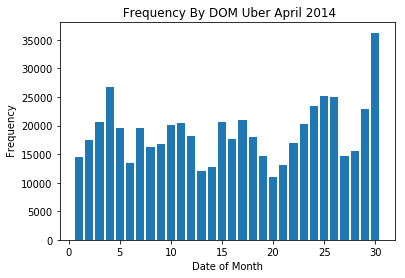

In [12]:
hist( data.dom, bins=30, rwidth=.8, range= (.5,30.5))
xlabel( "Date of Month")
ylabel( " Frequency")
title( " Frequency By DOM Uber April 2014")

In [24]:
#for k, rows in data.groupby('dom'):
   # print ((k ,rows))
   # break
    #print( k, len(rows))
def count_rows(rows):
  return len(rows)
by_date= data.groupby('dom').apply(count_rows)
by_date
    

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

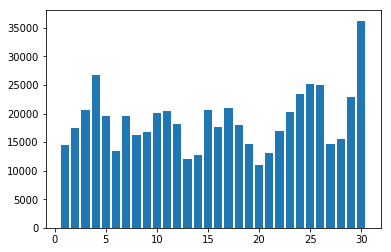

In [25]:
bar(range(1,31),by_date)

In [34]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

Text(0.5,1,' Frequency By DOM Uber April 2014')

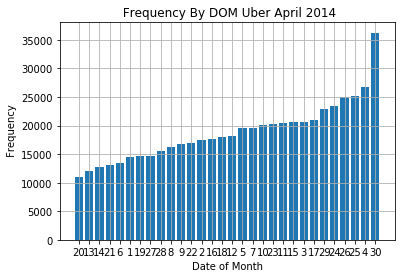

In [51]:
bar(range(1,31),by_date_sorted)
xticks(range(1,31),by_date_sorted.index);
plt.grid(True)
xlabel( "Date of Month")
ylabel( " Frequency")
title( " Frequency By DOM Uber April 2014")

## Analyze the hour

Text(0.5,1,' Frequency By Hour Uber April 2014')

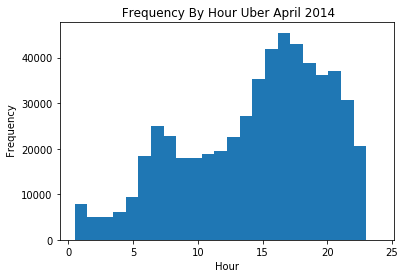

In [58]:
hist(data.hour, bins=24,range=(.5,24));
xlabel( "Hour")
ylabel( " Frequency")
title( " Frequency By Hour Uber April 2014")

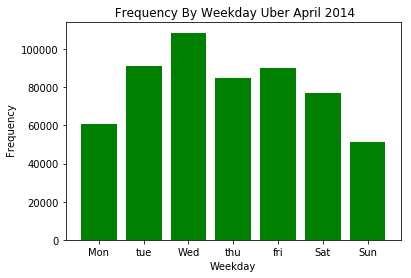

In [101]:
hist(data.weekday, bins=7, rwidth= .8 ,range=(-.5,6.5), color = 'green');
xlabel( "Weekday")
ylabel( " Frequency")
title( " Frequency By Weekday Uber April 2014")
xticks(range(7),'Mon tue Wed thu fri Sat Sun'.split());

## Cross Analysis Hour and Dayofweeks

In [72]:
by_cross = data.groupby( 'weekday hour'.split()).apply(count_rows).unstack()

In [73]:
by_cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


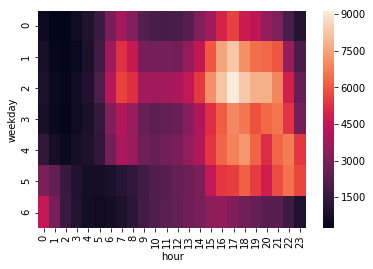

In [74]:
seaborn.heatmap(by_cross)

## By latitude and longitude

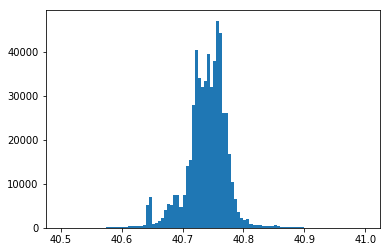

In [78]:
hist( data['Lat'],bins=100, range= (40.5,41));

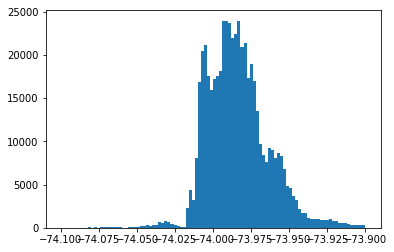

In [85]:
hist( data['Lon'],bins=100,range= (-74.1,-73.9));

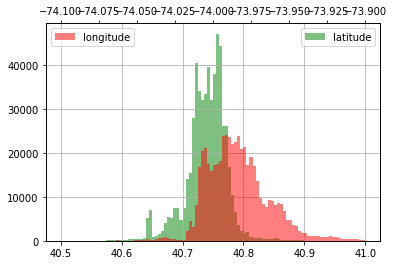

In [92]:
hist( data['Lat'],bins=100, range= (40.5,41), color='g', alpha=.5, label= 'latitude');
legend(loc= 'best')
grid()
twiny()
hist( data['Lon'],bins=100,range= (-74.1,-73.9), color= 'r', alpha=.5, label= 'longitude');
legend(loc='upper left')


(-74.2, -73.7)

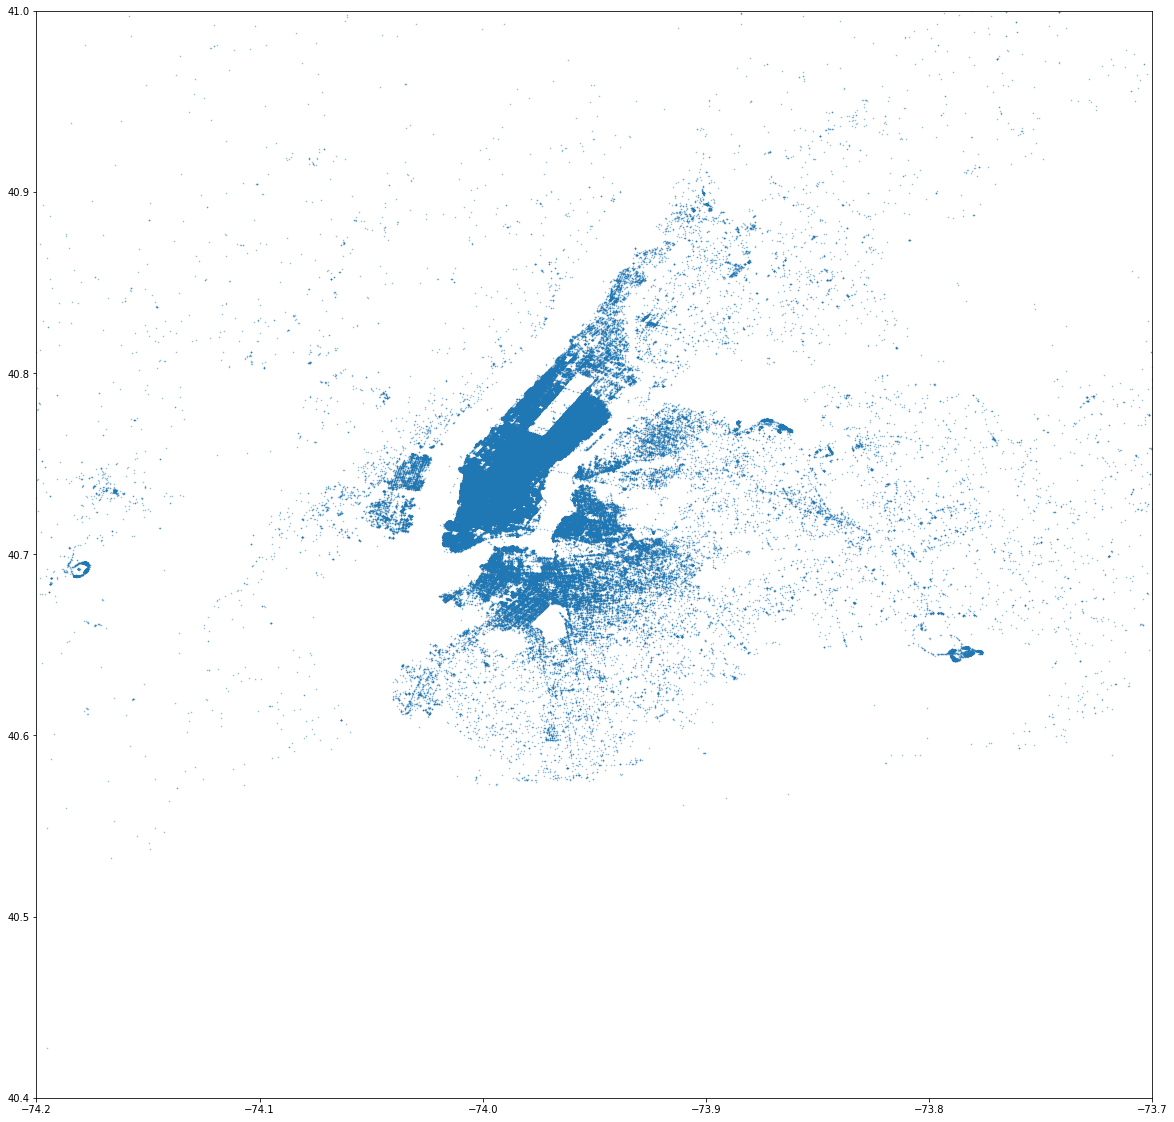

In [94]:
figure(figsize=(20,20))
plot( data['Lon'],data['Lat'], '.',ms=1, alpha= .5)
ylim( 40.4,41)
xlim(-74.2, -73.7)


In [3]:
data.tail()

NameError: name 'data' is not defined

In [5]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30
